In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import torch

import sys
sys.path.insert(0, '../fem')
from datasaver import *
from ManufacturedSolutionsDarcy import *

import sys
sys.path.insert(0, '../ml')
from modelloader import loadmodelfromlabel
from NGO import NGO

In [2]:
%load_ext autoreload
%autoreload 2

In [18]:
from NGO_D import NGO

logdir = '../../../nnlogs'
map_location = 'cpu'

sublogdir = 'MS_l2e-1_h64'
DeepONet_UQ12 = loadmodelfromlabel(model=NGO, label='DeepONet_UQ12', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
VarMiON_UQ12 = loadmodelfromlabel(model=NGO, label='VarMiON_UQ12', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
NGO_UQ10 = loadmodelfromlabel(model=NGO, label='NGO_UQ10', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
NGO_GL10 = loadmodelfromlabel(model=NGO, label='NGO_GL10', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
NGO_UQ100 = loadmodelfromlabel(model=NGO, label='NGO_UQ100', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
NGO_GL100 = loadmodelfromlabel(model=NGO, label='NGO_GL100', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
FEM_GL100 = loadmodelfromlabel(model=NGO, label='NGO_GL100', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
FEM_GL100.hparams['modeltype'] = 'FEM'
proj_GL100 = loadmodelfromlabel(model=NGO, label='NGO_GL100', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
proj_GL100.hparams['modeltype'] = 'projection'

### Manufactured solutions test dataset

In [34]:
l = 0.5

N_samples = 1

dataset = MFSetDarcy(N_samples=N_samples, d=2, l_theta_min=l, l_theta_max=l, l_u_min=l/2, l_u_max=l/2)
theta_test = dataset.theta
f_test = dataset.f
etat_test = dataset.etat
etab_test = dataset.etab
gl_test = dataset.gl
gr_test = dataset.gr
u_test = dataset.u

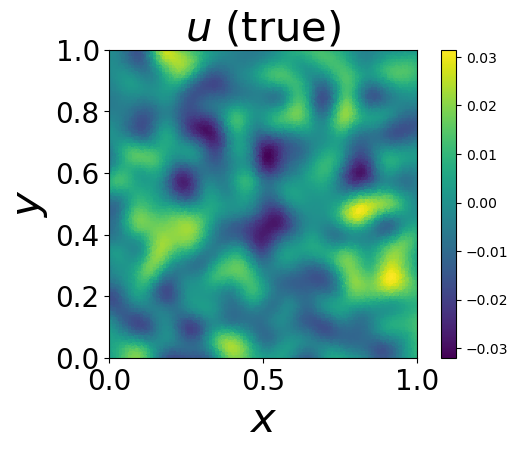

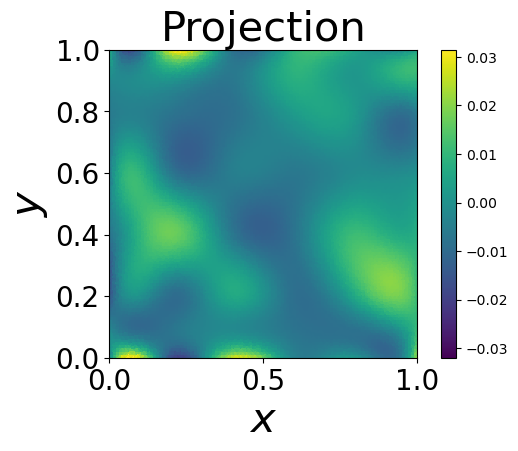

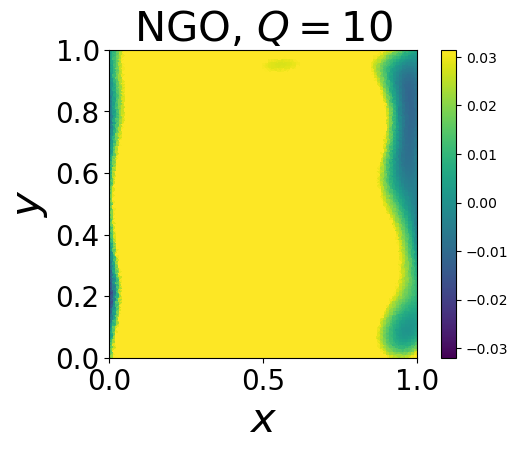

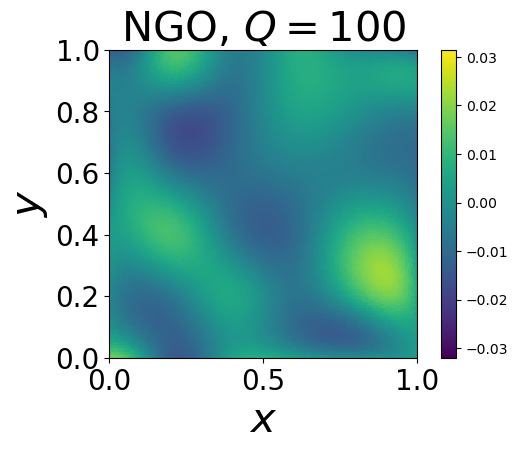

In [30]:
i = 0
size_ticklabels = 20
size_axeslabels = 30
size_title = 30
box_lw = 10

X, Y = np.mgrid[0:1:100*1j, 0:1:100*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T
    
fig, ax = plt.subplots(1,1, figsize=(6,4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot1 = ax.tripcolor(x[:,0], x[:,1], u_test[i](x), vmin=np.amin(u_test[i](x)), vmax=np.amax(u_test[i](x)))#, cmap='hot')
ax.set_title(r'$u$ (true)', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot1, ax=ax)
#plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("u.pdf", bbox_inches='tight', transparent=True)

fig, ax = plt.subplots(1,1, figsize=(6,4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

u_proj = proj_GL100.simforward(theta_test, f_test, etab_test, etat_test, gl_test, gr_test, x.reshape((100,100,2)), u_test).flatten()

plot2 = ax.tripcolor(x[:,0], x[:,1], u_proj, vmin=np.amin(u_test[i](x)), vmax=np.amax(u_test[i](x)))#, cmap='hot')
ax.set_title(r'Projection', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot1, ax=ax)
#plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("u_proj.pdf", bbox_inches='tight', transparent=True)

# fig, ax = plt.subplots(1,1, figsize=(6,4))
# fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

# u_FEM = FEM_GL100.simforward(theta_test, f_test, etab_test, etat_test, gl_test, gr_test, x.reshape((100,100,2)), u_test).flatten()

# plot2 = ax.tripcolor(x[:,0], x[:,1], u_FEM, vmin=np.amin(u_test[i](x)), vmax=np.amax(u_test[i](x)))#, cmap='hot')
# ax.set_title(r'FEM, $Q=100$', fontsize=size_title)
# ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.ticklabel_format(style='sci', scilimits=[-3,3])
# ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
# ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
# ax.set_xlim(0,1)
# ax.set_ylim(0,1)
# ax.set_aspect('equal')
# fig.colorbar(plot1, ax=ax)
# #plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

# # plt.savefig("u_FEM_l1e-1.pdf", bbox_inches='tight', transparent=True)

fig, ax = plt.subplots(1,1, figsize=(6,4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

u_hat = NGO_GL10.simforward(theta_test, f_test, etab_test, etat_test, gl_test, gr_test, x.reshape((100,100,2)), u_test).flatten()

plot2 = ax.tripcolor(x[:,0], x[:,1], u_hat, vmin=np.amin(u_test[i](x)), vmax=np.amax(u_test[i](x)))#, cmap='hot')
ax.set_title(r'NGO, $Q=10$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot1, ax=ax)
#plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("u_NGO_Q10.pdf", bbox_inches='tight', transparent=True)

fig, ax = plt.subplots(1,1, figsize=(6,4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

u_hat = NGO_GL100.simforward(theta_test, f_test, etab_test, etat_test, gl_test, gr_test, x.reshape((100,100,2)), u_test).flatten()

plot2 = ax.tripcolor(x[:,0], x[:,1], u_hat, vmin=np.amin(u_test[i](x)), vmax=np.amax(u_test[i](x)))#, cmap='hot')
ax.set_title(r'NGO, $Q=100$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot1, ax=ax)
#plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("u_NGO_Q100.pdf", bbox_inches='tight', transparent=True)

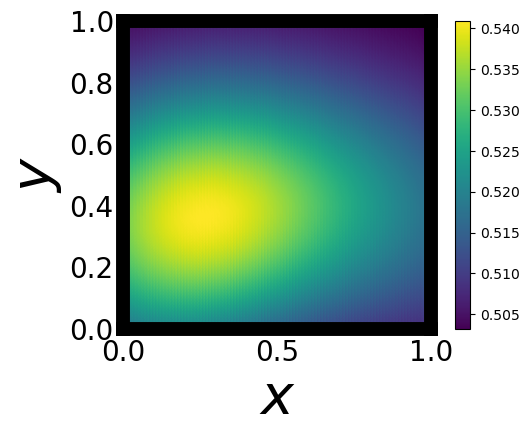

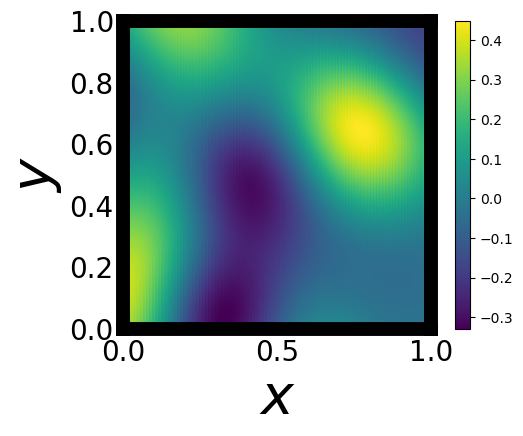

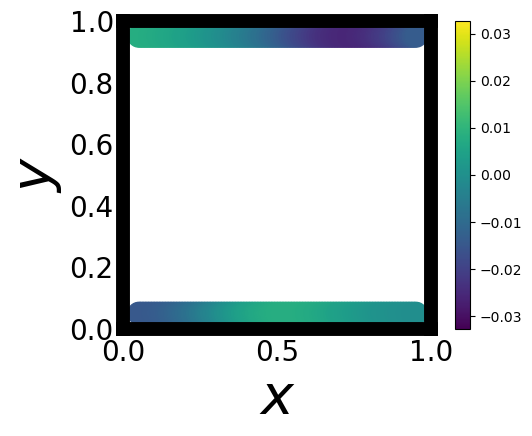

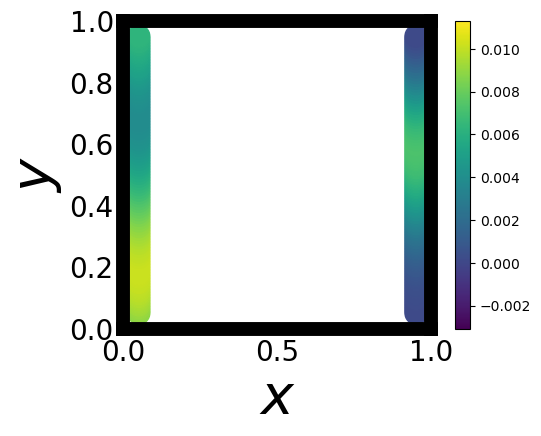

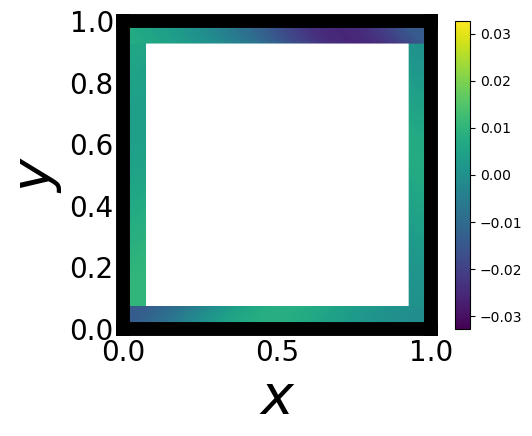

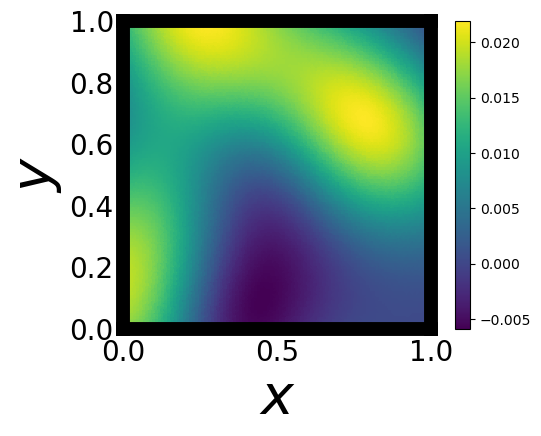

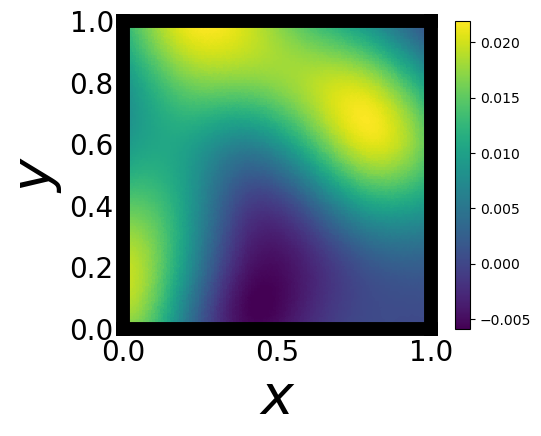

In [43]:
i = 0
size_ticklabels = 20
size_axeslabels = 40
size_title = 25
box_lw = 10

Q = 100
X, Y = np.mgrid[0:1:Q*1j, 0:1:Q*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T
    
fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

# plot0 = ax.tripcolor(x[:,0], x[:,1], theta_test[i](x))
plot0 = ax.scatter(x[:,0], x[:,1], c=theta_test[i](x), s=250)
#ax.set_title(r'$\theta(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("theta.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

# plot0 = ax.tripcolor(x[:,0], x[:,1], f_test[i](x))
plot0 = ax.scatter(x[:,0], x[:,1], c=f_test[i](x), s=250)
#ax.set_title(r'$f(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("f.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

vmin = min(np.amin(etab_test[i](x)),np.amin(etat_test[i](x)))
vmax = max(np.amax(etab_test[i](x)),np.amax(etat_test[i](x)))
# fig = ax.scatter(x[x[:,1]==0,0], x[x[:,1]==0,1], c=etab_test[i](x)[x[:,1]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=1000, vmin=vmin, vmax=vmax)
# fig = ax.scatter(x[x[:,1]==1,0], x[x[:,1]==1,1], c=etat_test[i](x)[x[:,1]==1], label=r'$\eta_\mathrm{top}(x)$', s=1000, vmin=vmin, vmax=vmax)
fig = ax.scatter(0.05+0.9*x[x[:,1]==0,0], 0.05+0.9*x[x[:,1]==0,1], c=etab_test[i](x)[x[:,1]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=250, vmin=vmin, vmax=vmax)
fig = ax.scatter(0.05+0.9*x[x[:,1]==1,0], 0.05+0.9*x[x[:,1]==1,1], c=etat_test[i](x)[x[:,1]==1], label=r'$\eta_\mathrm{top}(x)$', s=250, vmin=vmin, vmax=vmax)
#ax.set_title(r'$\eta(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
# ax.legend(fontsize=20)
ax.set_box_aspect(1)
plt.colorbar(fig)
# ax.grid()
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

plt.savefig("eta.svg", bbox_inches='tight', transparent=True)

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

vmin = min(np.amin(gl_test[i](x)),np.amin(gr_test[i](x)))
vmax = max(np.amax(gl_test[i](x)),np.amax(gr_test[i](x)))
# fig = ax.scatter(x[x[:,0]==0,0], x[x[:,0]==0,1], c=gl_test[i](x)[x[:,0]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=1000, vmin=vmin, vmax=vmax)
# fig = ax.scatter(x[x[:,0]==1,0], x[x[:,0]==1,1], c=gr_test[i](x)[x[:,0]==1], label=r'$\eta_\mathrm{top}(x)$', s=1000, vmin=vmin, vmax=vmax)
fig = ax.scatter(0.05+0.9*x[x[:,0]==0,0], 0.05+0.9*x[x[:,0]==0,1], c=gl_test[i](x)[x[:,0]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=250, vmin=vmin, vmax=vmax)
fig = ax.scatter(0.05+0.9*x[x[:,0]==1,0], 0.05+0.9*x[x[:,0]==1,1], c=gr_test[i](x)[x[:,0]==1], label=r'$\eta_\mathrm{top}(x)$', s=250, vmin=vmin, vmax=vmax)
#ax.set_title(r'$g(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
# ax.legend(fontsize=20)
ax.set_box_aspect(1)
plt.colorbar(fig)
# ax.grid()
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

plt.savefig("g.svg", bbox_inches='tight', transparent=True)

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

vmin = min(np.amin(etab_test[i](x)),np.amin(etat_test[i](x)),np.amin(gl_test[i](x)),np.amin(gr_test[i](x)))
vmax = max(np.amax(etab_test[i](x)),np.amax(etat_test[i](x)),np.amax(gl_test[i](x)),np.amax(gr_test[i](x)))
fig = ax.scatter(x[x[:,0]==0,0], x[x[:,0]==0,1], c=gl_test[i](x)[x[:,0]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=1000, vmin=vmin, vmax=vmax)
fig = ax.scatter(x[x[:,0]==1,0], x[x[:,0]==1,1], c=gr_test[i](x)[x[:,0]==1], label=r'$\eta_\mathrm{top}(x)$', s=1000, vmin=vmin, vmax=vmax)
fig = ax.scatter(x[x[:,1]==0,0], x[x[:,1]==0,1], c=etab_test[i](x)[x[:,1]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=1000, vmin=vmin, vmax=vmax)
fig = ax.scatter(x[x[:,1]==1,0], x[x[:,1]==1,1], c=etat_test[i](x)[x[:,1]==1], label=r'$\eta_\mathrm{top}(x)$', s=1000, vmin=vmin, vmax=vmax)
#ax.set_title(r'$\eta(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
# ax.legend(fontsize=20)
ax.set_box_aspect(1)
plt.colorbar(fig)
# ax.grid()
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

# plt.savefig("vecg.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot1 = ax.tripcolor(x[:,0], x[:,1], u_test[i](x), vmin=np.amin(u_test[i](x)), vmax=np.amax(u_test[i](x)))
#ax.set_title(r'$u(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot1, ax=ax)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("u.svg", bbox_inches='tight', transparent=True)

model = NGO_GL100

u_hat = model.simforward([theta_test[i]], [f_test[i]], [etab_test[i]], [etat_test[i]], [gl_test[i]], [gr_test[i]], x.reshape((Q,Q,2)), u_test[i]).flatten()

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot2 = ax.tripcolor(x[:,0], x[:,1], u_hat, vmin=np.amin(u_test[i](x)), vmax=np.amax(u_test[i](x)))
#ax.set_title(r'$\hat{u}(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot1, ax=ax)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("u_hat_NGO.svg", bbox_inches='tight', transparent=True)